In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
def delete_files(directory):
    # 获取目录下的所有文件和子目录
    files = os.listdir(directory)
    
    for file in files:
        file_path = os.path.join(directory, file)
        
        # 判断是否为文件
        if os.path.isfile(file_path):
            # 删除文件
            os.remove(file_path)
        elif os.path.isdir(file_path):
            # 如果是目录，则递归调用函数删除子目录中的文件
            delete_files(file_path)
            # 删除空目录
            os.rmdir(file_path)

In [ ]:
def clean_up():
    delete_files('.\\preprocess\\train\\positive')
    delete_files('.\\preprocess\\train\\negative')
    delete_files('.\\preprocess\\val\\positive')
    delete_files('.\\preprocess\\val\\negative')
    delete_files('.\\pic_positive')
    delete_files('.\\pic_negative')

In [ ]:
#clean_up()

In [164]:
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.file_list = []
        self.labels = []

        # 获取数据文件夹中的文件列表和标签
        for label in os.listdir(data_dir):
            label_dir = os.path.join(data_dir, label)
            if os.path.isdir(label_dir):
                files = os.listdir(label_dir)
                self.file_list.extend(files)
                self.labels.extend([label] * len(files))

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_name = self.file_list[idx]
        file_path = os.path.join(self.data_dir, self.labels[idx], file_name)
        data = np.load(file_path)['matrix1']
        label = self.labels[idx]

        if self.transform:
            data = self.transform(data)

        print(data.shape)
        return data, label

def normalize_array(arr):
    arr = np.clip(arr, 0, 0.01)  # 将数值限制在0到0.01之间
    arr = (arr - 0) / (0.01 - 0)  # 归一化到0到1之间
    return arr

def numpy_to_pil(sample):
    sample = normalize_array(sample)
    print(sample)
    sample = Image.fromarray(sample, mode='L')  # 指定图像模式为单通道
    sample.show()
    return sample



data_transforms = {
    'train': transforms.Compose([
        transforms.Lambda(numpy_to_pil),  # 添加自定义转换函数
        transforms.Resize(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]),
    'val': transforms.Compose([
        transforms.Lambda(numpy_to_pil),  # 添加自定义转换函数
        transforms.Resize(224),
        transforms.ToTensor(),
    ]),
}

data_dir = '.\\preprocess'

image_datasets = {x: CustomDataset(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = ['positive', 'negative']  # 如果您的数据集有类别标签，可以在这里添加类别名

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [165]:
dataloaders['train']

In [166]:
iter_dataloader = iter(dataloaders['train'])
print(iter_dataloader)

In [167]:
next(iter_dataloader)

[[1.         0.49544978 0.         ... 0.8031421  0.77366143 0.5629355 ]
 [0.1884092  0.         0.         ... 0.56940717 0.7212403  0.21523853]
 [0.28683275 0.6681152  0.654152   ... 0.12522168 0.3201483  0.02877904]
 ...
 [1.         0.15198848 0.41291538 ... 0.4646332  0.         0.10974114]
 [0.9537647  0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.1293366  ... 0.         0.         0.        ]]
torch.Size([1, 224, 224])


[tensor([[[[0.2588, 0.2784, 0.1882,  ..., 0.2078, 0.1451, 0.1686],
           [0.2549, 0.2549, 0.1804,  ..., 0.2039, 0.2039, 0.2235],
           [0.1725, 0.1725, 0.1725,  ..., 0.3137, 0.3059, 0.2275],
           ...,
           [0.2549, 0.3020, 0.3569,  ..., 0.3373, 0.3333, 0.3255],
           [0.2706, 0.2902, 0.3176,  ..., 0.2667, 0.3529, 0.3882],
           [0.2314, 0.3176, 0.3961,  ..., 0.1804, 0.2745, 0.2078]]]]),
 ('positive',)]

In [157]:
print(class_names)

['positive', 'negative']


[[0.06504617 0.         0.         ... 0.05943424 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.05580209]
 [0.         0.         0.02952662 ... 0.1645756  0.0961762  0.        ]
 ...
 [0.06304707 0.01065799 0.00269734 ... 0.         0.         0.04610183]
 [0.         0.03901693 0.         ... 0.         0.02701087 0.05297153]
 [0.         0.         0.         ... 0.05157423 0.05281029 0.09502327]]
torch.Size([1, 224, 224])
tensor([[[[0.0941, 0.1529, 0.4314,  ..., 0.2157, 0.1333, 0.1137],
          [0.1569, 0.2118, 0.2510,  ..., 0.1922, 0.1569, 0.3137],
          [0.2275, 0.1647, 0.2078,  ..., 0.2275, 0.2941, 0.2392],
          ...,
          [0.2000, 0.2431, 0.1412,  ..., 0.0745, 0.1059, 0.2000],
          [0.2627, 0.2784, 0.2353,  ..., 0.1333, 0.1255, 0.2588],
          [0.2078, 0.2431, 0.1137,  ..., 0.1882, 0.0549, 0.1804]]]]) ('negative',)
torch.Size([1, 224, 224])
(224, 224)


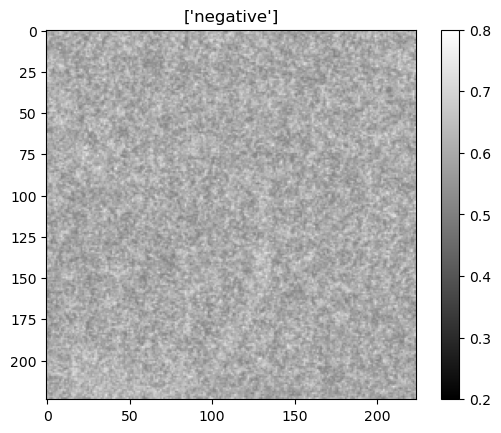

In [159]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    print(inp.shape)
    inp = inp.squeeze().numpy()
    print(inp.shape)
    mean = np.array([0.5])  # 修改为单通道的均值
    std = np.array([0.5])  # 修改为单通道的标准差
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp, cmap='gray', vmin=0.2, vmax=0.8)  # 指定灰度色彩映射
    plt.colorbar()
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(inputs, classes)
# Make a grid from batch
out = torchvision.utils.make_grid(inputs.unsqueeze(0))  # 将输入转换为四维张量

imshow(out[0], title=[x for x in classes])

[[0.         0.         0.08201039 ... 0.294468   0.         0.        ]
 [0.14624292 0.09991553 0.1359702  ... 0.06503052 0.         0.        ]
 [0.11323514 0.         0.6810526  ... 0.43836987 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.2626419  0.34860286 0.31110445 ... 0.         0.         0.        ]
 [0.15478149 0.4125245  0.4061813  ... 0.         0.         0.        ]]


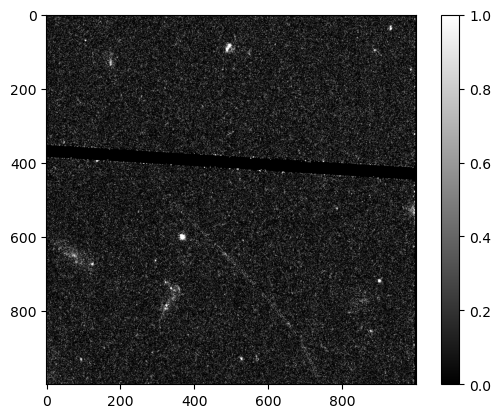

In [168]:
data = np.load('.\\preprocess\\train\\positive\\0-ib1901010.npz')['matrix1']
data = normalize_array(data)
print(data)
plt.imshow(data, cmap='gray', vmin=0, vmax=1)
plt.colorbar()

image = Image.fromarray(data, mode='L')
image.show()